# Mentoría "Predicción de lluvias extremas"

# TP 1: Análisis y Visualización de Datos

## Importacion de librerias

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import pymannkendall as mk

Links útiles (ordenados de simples a complejos):

https://towardsdatascience.com/time-series-analysis-for-machine-learning-with-python-626bee0d0205

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8

## Lectura de datos

In [2]:
Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_LluviasExtremas/master/dataset/datos_diarios_cordoba.csv", parse_dates = True, index_col="fecha")
id_Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_LluviasExtremas/master/dataset/metadatos_estaciones.csv")

## Previsualización de datos

In [3]:
Datos.describe()

,id,omm_id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
count,249627.000000,2.496270e+05,171930.000000,202229.000000,168343.000000,232801.000000,166202.000000,130758.000000,202279.000000,205391.000000,168350.000000,203718.000000,160329.000000,160366.000000,198257.000000,12497.000000
mean,124814.000000,1.010553e+06,7.081167,67.169704,3.703177,2.286027,973.357425,1013.785112,10.585408,24.396732,17.657120,11.129973,17.059827,8.044349,2.811324,90.238606
std,72061.252161,2.899696e+06,3.849349,15.471247,2.620435,8.320615,18.048091,6.509967,6.673138,6.538179,6.248322,6.271125,11.421939,4.866475,2.089806,91.555475
min,1.000000,1.000000e+00,0.000000,7.000000,0.000000,0.000000,927.400000,989.900000,-17.600000,-0.400000,-3.300000,-13.000000,0.000000,0.000000,0.000000,10.195410
25%,62407.500000,8.732800e+04,4.300000,57.000000,1.000000,0.000000,960.500000,1009.200000,5.800000,19.600000,12.900000,6.600000,5.000000,4.100000,1.200000,43.460000
50%,124814.000000,8.734900e+04,8.100000,68.000000,4.000000,0.000000,970.100000,1013.300000,11.400000,24.800000,18.000000,11.800000,18.000000,7.200000,2.300000,61.953000
75%,187220.500000,8.746700e+04,10.000000,79.000000,6.000000,0.000000,988.000000,1017.800000,15.900000,29.400000,22.500000,16.100000,23.000000,10.800000,3.900000,101.865600
max,249627.000000,9.987015e+06,19.100000,100.000000,8.000000,240.000000,1026.700000,1042.600000,30.500000,45.100000,38.500000,31.700000,99.000000,88.500000,24.722222,1403.024000


In [4]:
Datos.head(10)

,id,omm_id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
fecha,,,,,,,,,,,,,,,,
1961-01-01,1,87244,NaN,62.0,0.0,0.0,965.9,NaN,15.9,32.3,25.1,13.5,NaN,NaN,1.0,NaN
1961-01-02,2,87244,NaN,66.0,6.0,28.0,969.9,NaN,15.5,27.5,22.2,18.3,NaN,NaN,1.0,NaN
1961-01-03,3,87244,NaN,92.0,8.0,15.4,972.6,NaN,13.1,21.7,14.4,12.9,NaN,NaN,4.5,NaN
1961-01-04,4,87244,NaN,84.0,5.0,0.0,969.6,NaN,17.4,23.1,20.4,13.9,NaN,NaN,0.3,NaN
1961-01-05,5,87244,NaN,84.0,5.0,3.6,965.6,NaN,17.8,23.9,20.7,15.5,NaN,NaN,1.5,NaN
1961-01-06,6,87244,NaN,54.0,0.0,0.0,970.2,NaN,13.2,27.2,23.3,12.7,NaN,NaN,2.2,NaN
1961-01-07,7,87244,NaN,56.0,0.0,0.0,967.7,NaN,15.1,31.4,25.0,12.1,NaN,NaN,2.6,NaN
1961-01-08,8,87244,NaN,59.0,2.0,0.0,965.8,NaN,18.1,32.9,27.0,15.6,NaN,NaN,2.9,NaN
1961-01-09,9,87244,NaN,52.0,3.0,0.0,963.2,NaN,20.4,34.9,31.4,20.4,NaN,NaN,9.4,NaN


In [5]:
Datos.tail(10)

,id,omm_id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
fecha,,,,,,,,,,,,,,,,
2017-08-24,249618,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.39352
2017-08-25,249619,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.59718
2017-08-26,249620,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.49365
2017-08-27,249621,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.64530
2017-08-28,249622,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.53622
2017-08-29,249623,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.50303
2017-08-30,249624,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.93904
2017-08-31,249625,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.33246
2017-09-01,249626,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.72549


In [6]:
id_Datos

,id,omm_id,nombre,lon_grad,lon_min,lon_seg,lon_hem,lat_grad,lat_min,lat_seg,...,lon_dec,lat_dec,elev,institucion_id,nivel_adm1,nivel_adm2,fecha_inicio,tipo,pais_id,siglas
0,1,87244,Villa Maria del Rio Seco,63,43,39.31,W,29,54,20.90,...,-63.727586,-29.905806,341,1,Cordoba,Rio Seco,1/10/1903,C,AR,SMN
1,2,87328,Villa Dolores Aero,65,8,56.54,W,31,57,4.66,...,-65.149040,-31.951295,569,1,Cordoba,San Javier,1/10/1903,C,AR,SMN
2,3,87344,Cordoba Aero,64,12,42.67,W,31,17,47.87,...,-64.211853,-31.296630,474,1,Cordoba,Colon,1/1/1946,C,AR,SMN
3,4,87345,Cordoba Obs.,64,11,53.79,W,31,25,14.73,...,-64.198276,-31.420759,426,1,Cordoba,Capital,1/1/1961,C,AR,SMN
4,5,87349,Pilar Obs.,63,52,55.19,W,31,40,5.11,...,-63.881997,-31.668086,338,1,Cordoba,Rio Segundo,1/1/1907,C,AR,SMN
5,6,87466,Marcos Juarez INTA,62,7,0.00,W,32,41,0.00,...,-62.120000,-32.680000,110,2,Cordoba,Marcos Juarez,10/1/1967,C,AR,INTA
6,7,87453,Rio Cuarto Aero,64,16,37.10,W,33,5,43.80,...,-64.276973,-33.095500,421,1,Cordoba,Rio Cuarto,1/1/1875,C,AR,SMN
7,8,87467,Marcos Juarez Aero,62,9,1.85,W,32,40,46.91,...,-62.150513,-32.679697,114,1,Cordoba,Marcos Juarez,1/1/1947,C,AR,SMN
8,9,87534,Laboulaye Aero,63,22,3.48,W,34,7,40.24,...,-63.367634,-34.127844,137,1,Cordoba,Presidente Roque Saenz PeNaN,1/7/1913,C,AR,SMN
9,10,9987009,Manfredi INTA,63,46,0.00,W,31,49,0.00,...,-63.770000,-31.820000,292,2,Cordoba,Rio Segundo,9/1/1969,C,AR,INTA


## CONSIGNA:

## 1. Estadísticos descriptivos

  1. Para comenzar, calcular el rango de las variables de cada estación.
  2. ¿Existen valores faltantes? Cuantificarlos.
  3. Realizar Box-Blot de cada variable para las diferentes estaciones.
  4. ¿Encuentran outliers en estas variables?


## 2. Agregación de datos
Año hidrológico: 1/julio al 30/junio
  1. Acumulen anualmente los datos de *prcp* (Precipitación Total Anual o PTA), y grafique los promedios en función de la elevación de la estación (*elev*).
  2. Acumulen anualmente los datos de *caudal* (sólo la estación Pueblo Andino tiene estos datos), y determine si la serie es estacionaria (es decir, ¿Hay tendencia?).
  3. Determinar la precipitación máxima diaria anual (PMDA) de cada estación y determinar si existen tendencias.
  4. Repita lo mismo del punto 3 pero para las temperaturas medias.
  5. ¿Las series de PMDA, responden a una distribución Normal? ¿Y las series de PTA?

In [7]:
stations_dataset = id_Datos.copy()
dataset = Datos.copy()

stations = stations_dataset.set_index('omm_id')['nombre'].to_dict()
elev = stations_dataset.set_index('omm_id')['elev'].to_dict()

## 1.1

In [8]:
dataset_groupby_station = dataset.groupby('omm_id')

dataset_groupby_station_maxvalues = dataset_groupby_station.max()
dataset_groupby_station_minvalues = dataset_groupby_station.min()

rango_df = dataset_groupby_station_maxvalues - dataset_groupby_station_minvalues

rango_df.reset_index(inplace=True)
dataset_groupby_station_maxvalues.reset_index(inplace=True)
dataset_groupby_station_minvalues.reset_index(inplace=True)

rango_df['station'] = rango_df['omm_id'].replace(stations)
dataset_groupby_station_maxvalues['station'] = dataset_groupby_station_maxvalues['omm_id'].replace(stations)
dataset_groupby_station_minvalues['station'] = dataset_groupby_station_minvalues['omm_id'].replace(stations)

### Valores Máximos

In [9]:
display(dataset_groupby_station_maxvalues)

,omm_id,id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal,station
0,1,237130,NaN,NaN,NaN,178.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La Florida
1,2,249627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1403.024,Pueblo Andino
2,87244,21557,NaN,100.0,8.0,165.0,998.5,1040.6,26.8,44.6,36.7,29.8,36.0,19.0,11.300000,NaN,Villa Maria del Rio Seco
3,87328,43114,14.1,100.0,8.0,104.0,969.8,1040.6,23.3,43.4,38.5,31.7,99.0,42.7,17.100000,NaN,Villa Dolores Aero
4,87344,64671,14.1,100.0,8.0,149.0,983.6,1042.6,24.8,42.4,33.5,26.2,36.0,42.7,11.800000,NaN,Cordoba Aero
5,87345,86228,19.1,99.0,8.0,198.0,989.0,1042.1,25.1,43.5,36.6,27.5,36.0,72.5,10.900000,NaN,Cordoba Obs.
6,87349,107785,13.9,100.0,8.0,150.9,999.9,1042.3,26.0,42.6,36.0,24.8,36.0,77.7,12.500000,NaN,Pilar Obs.
7,87453,129342,14.5,100.0,8.0,163.0,989.2,1042.2,23.3,42.9,33.9,26.6,36.0,48.4,18.100000,NaN,Rio Cuarto Aero
8,87466,148183,14.1,100.0,NaN,172.8,NaN,NaN,26.5,41.8,NaN,28.5,NaN,NaN,24.722222,NaN,Marcos Juarez INTA
9,87467,169740,14.1,100.0,8.0,161.8,1026.7,1041.4,25.9,42.0,34.7,27.0,36.0,82.8,19.900000,NaN,Marcos Juarez Aero


### Valores Mínimos

In [10]:
display(dataset_groupby_station_minvalues)

,omm_id,id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal,station
0,1,214883,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La Florida
1,2,237131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19541,Pueblo Andino
2,87244,1,NaN,18.0,0.0,0.0,940.0,991.2,-10.7,4.7,0.4,-10.5,0.0,0.0,0.0,NaN,Villa Maria del Rio Seco
3,87328,21558,0.0,12.0,0.0,0.0,927.4,989.9,-17.1,2.2,-1.3,-10.0,0.0,0.0,0.0,NaN,Villa Dolores Aero
4,87344,43115,0.0,14.0,0.0,0.0,939.6,991.2,-14.3,1.2,-1.2,-8.3,0.0,0.0,0.0,NaN,Cordoba Aero
5,87345,64672,0.0,16.0,0.0,0.0,943.5,994.6,-11.2,2.2,0.4,-7.1,0.0,0.0,0.0,NaN,Cordoba Obs.
6,87349,86229,0.0,13.0,0.0,0.0,953.8,990.9,-13.7,2.6,-0.1,-9.0,0.0,0.0,0.0,NaN,Pilar Obs.
7,87453,107786,0.0,14.0,0.0,0.0,946.0,992.4,-17.6,-0.4,-3.3,-10.6,0.0,0.0,0.0,NaN,Rio Cuarto Aero
8,87466,129343,0.0,7.0,NaN,0.0,NaN,NaN,-10.2,3.8,NaN,-10.5,NaN,NaN,0.0,NaN,Marcos Juarez INTA
9,87467,148184,0.0,19.0,0.0,0.0,978.9,991.6,-10.2,3.5,-0.9,-10.2,0.0,0.0,0.0,NaN,Marcos Juarez Aero


### Rango

In [11]:
display(rango_df)

,omm_id,id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal,station
0,1,22247,NaN,NaN,NaN,178.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La Florida
1,2,12496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1392.82859,Pueblo Andino
2,87244,21556,NaN,82.0,8.0,165.0,58.5,49.4,37.5,39.9,36.3,40.3,36.0,19.0,11.300000,NaN,Villa Maria del Rio Seco
3,87328,21556,14.1,88.0,8.0,104.0,42.4,50.7,40.4,41.2,39.8,41.7,99.0,42.7,17.100000,NaN,Villa Dolores Aero
4,87344,21556,14.1,86.0,8.0,149.0,44.0,51.4,39.1,41.2,34.7,34.5,36.0,42.7,11.800000,NaN,Cordoba Aero
5,87345,21556,19.1,83.0,8.0,198.0,45.5,47.5,36.3,41.3,36.2,34.6,36.0,72.5,10.900000,NaN,Cordoba Obs.
6,87349,21556,13.9,87.0,8.0,150.9,46.1,51.4,39.7,40.0,36.1,33.8,36.0,77.7,12.500000,NaN,Pilar Obs.
7,87453,21556,14.5,86.0,8.0,163.0,43.2,49.8,40.9,43.3,37.2,37.2,36.0,48.4,18.100000,NaN,Rio Cuarto Aero
8,87466,18840,14.1,93.0,NaN,172.8,NaN,NaN,36.7,38.0,NaN,39.0,NaN,NaN,24.722222,NaN,Marcos Juarez INTA
9,87467,21556,14.1,81.0,8.0,161.8,47.8,49.8,36.1,38.5,35.6,37.2,36.0,82.8,19.900000,NaN,Marcos Juarez Aero


## 1.2

Se observan varios valores faltantes. De todas maneras lo vamos a comprobar.

In [12]:
dataset.isna().any()

id          False
omm_id      False
helio        True
hr           True
nub          True
prcp         True
pres_est     True
pres_nm      True
td           True
tmax         True
tmed         True
tmin         True
vmax_d       True
vmax_f       True
vmed         True
caudal       True
dtype: bool

Vemos que todas las variables poseen valores faltantes. 
Procedemos a cuantificarlos:

In [13]:
dataset.isna().sum()

id               0
omm_id           0
helio        77697
hr           47398
nub          81284
prcp         16826
pres_est     83425
pres_nm     118869
td           47348
tmax         44236
tmed         81277
tmin         45909
vmax_d       89298
vmax_f       89261
vmed         51370
caudal      237130
dtype: int64

## 1.3

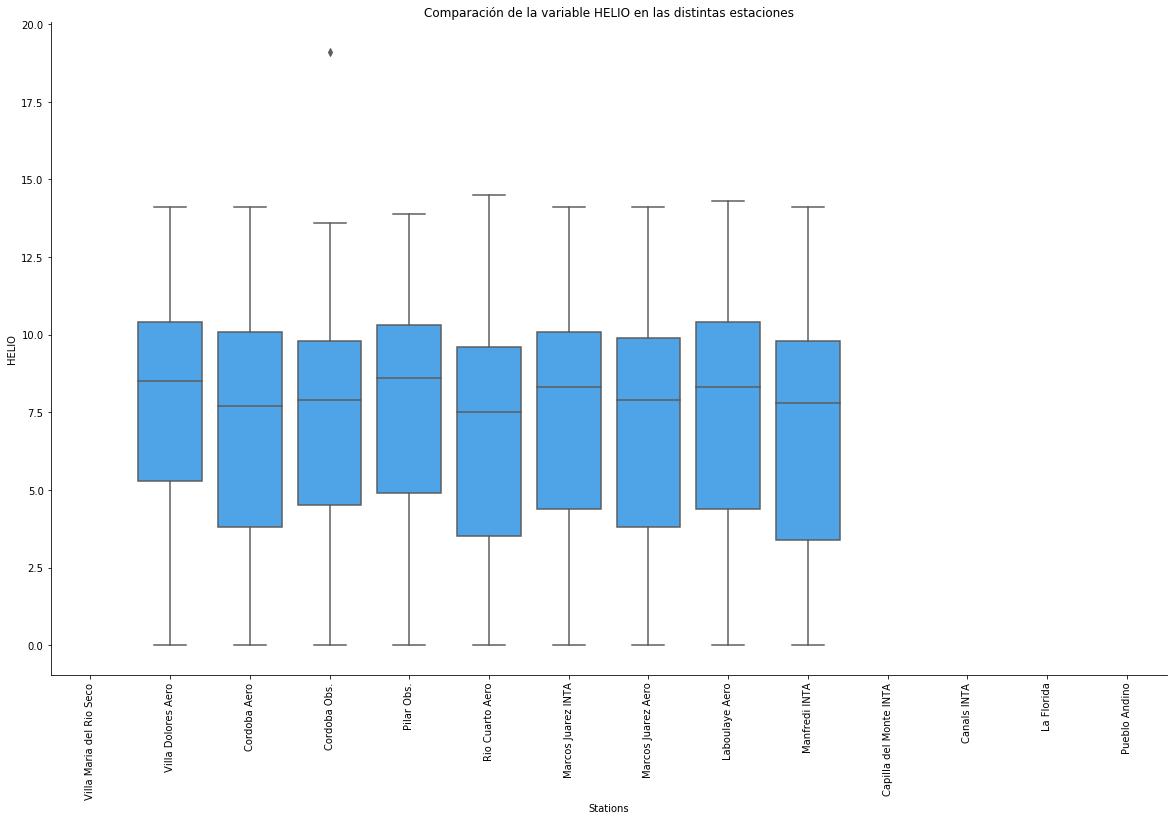

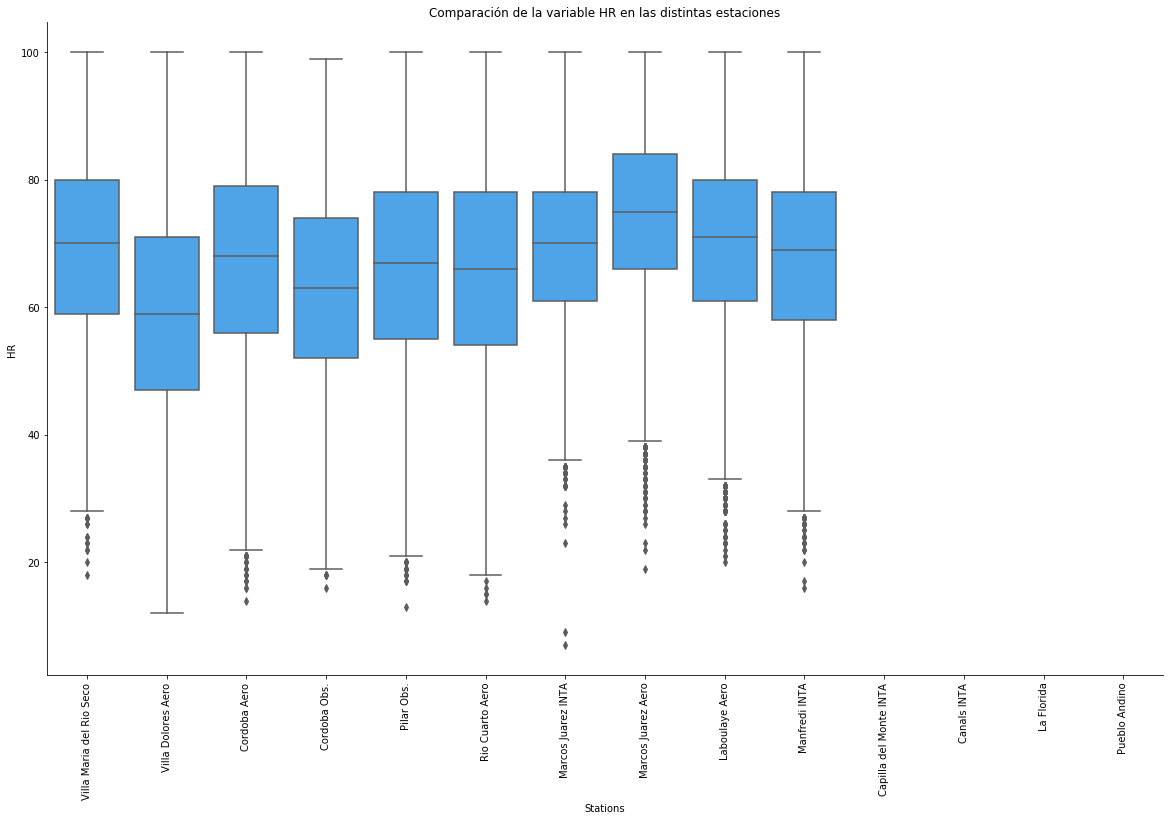

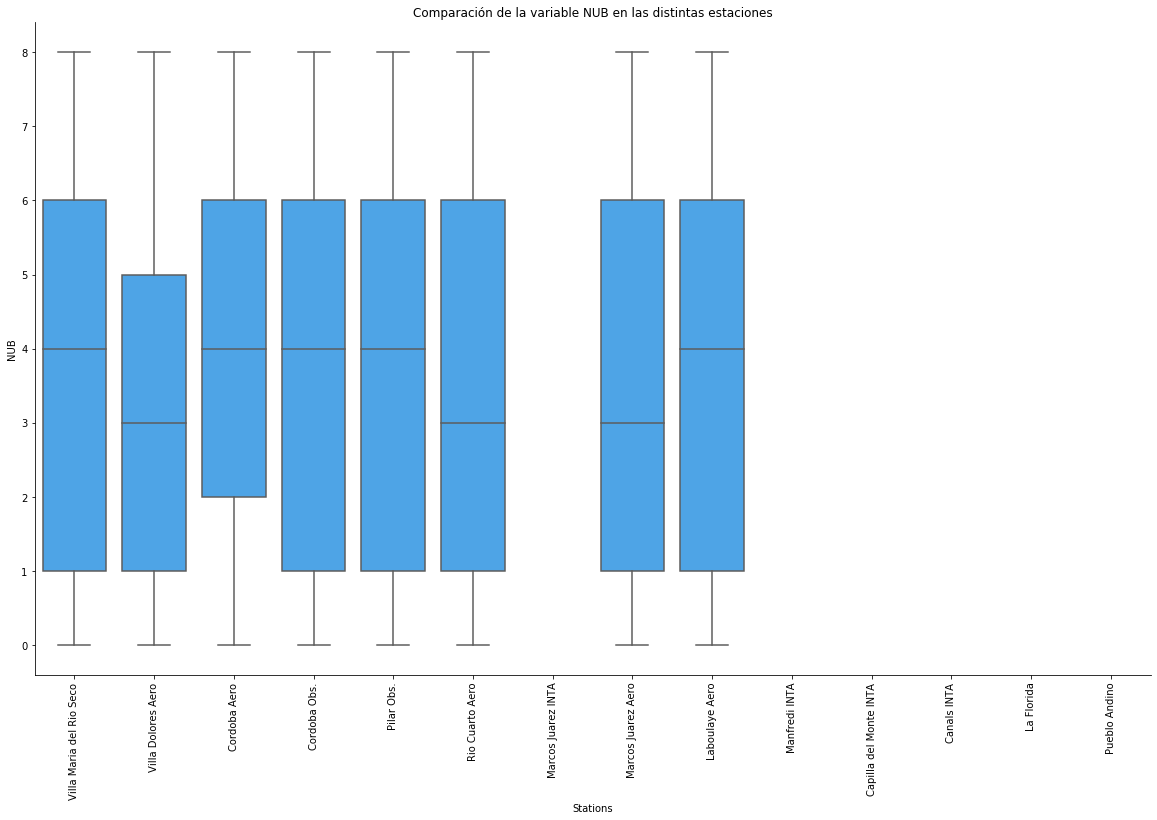

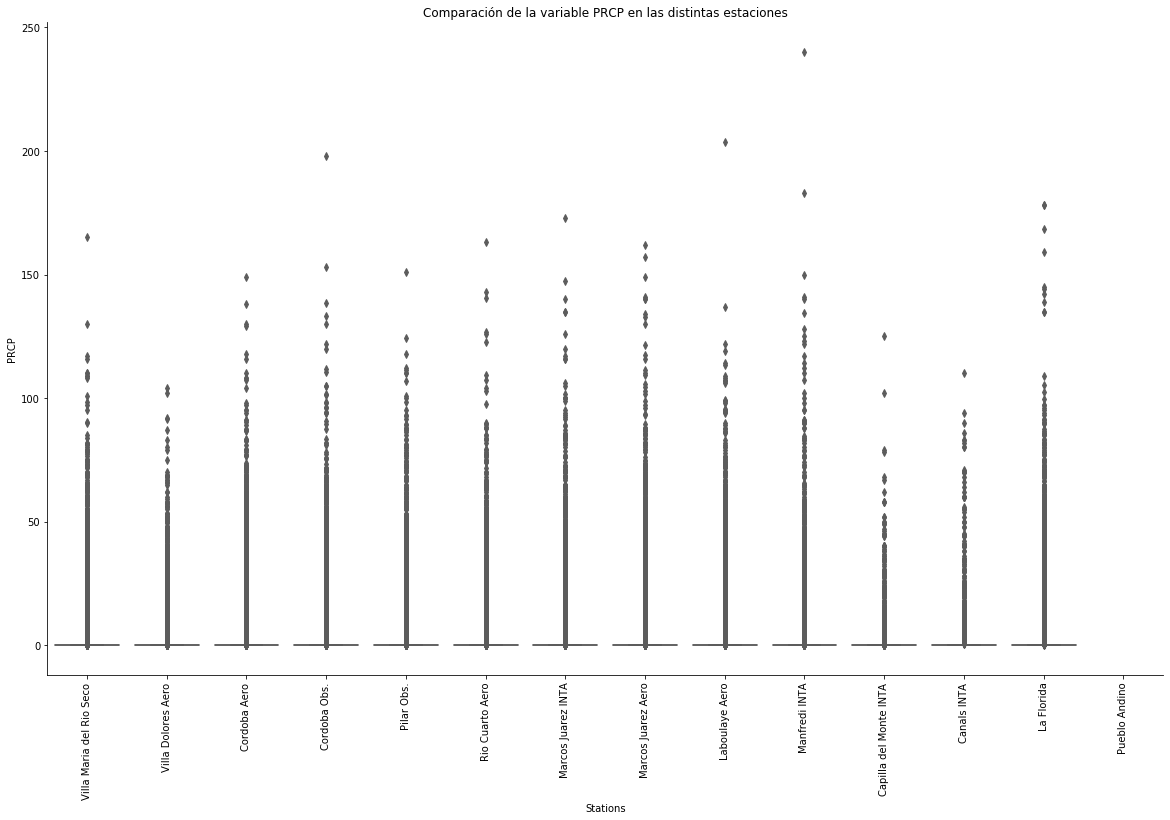

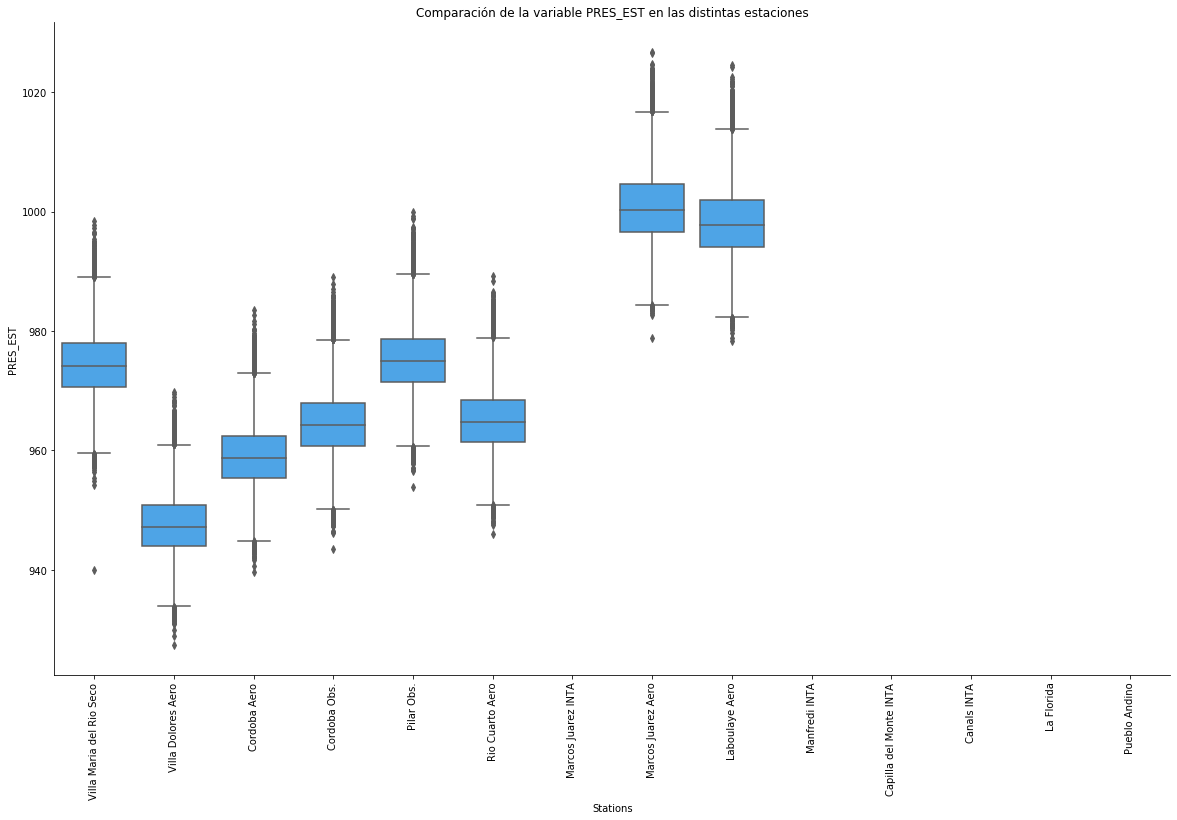

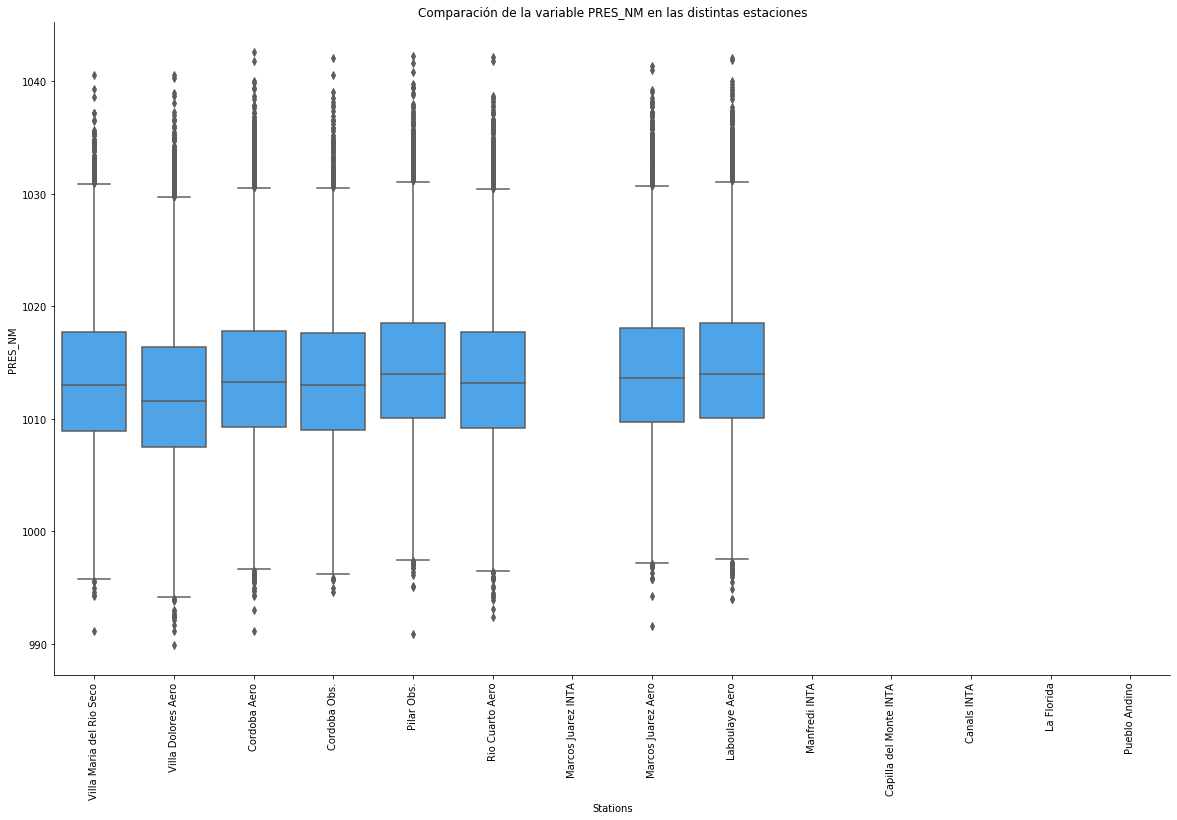

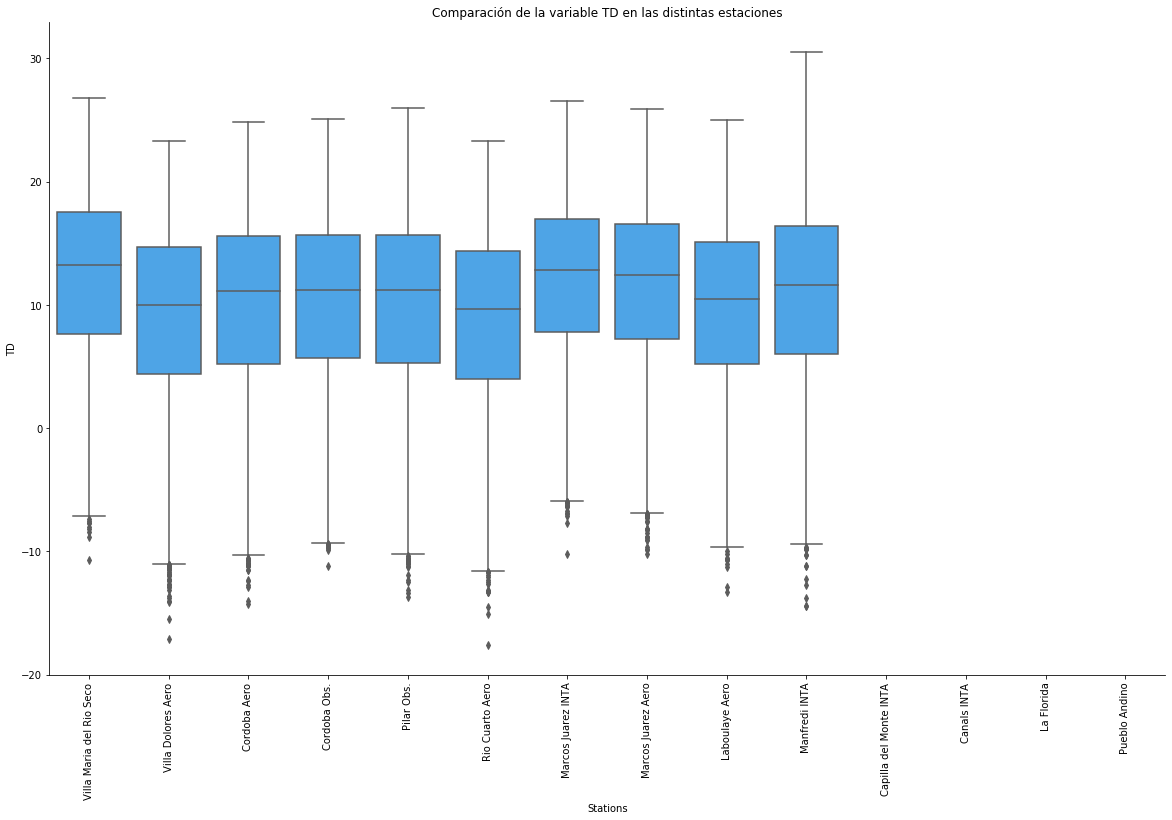

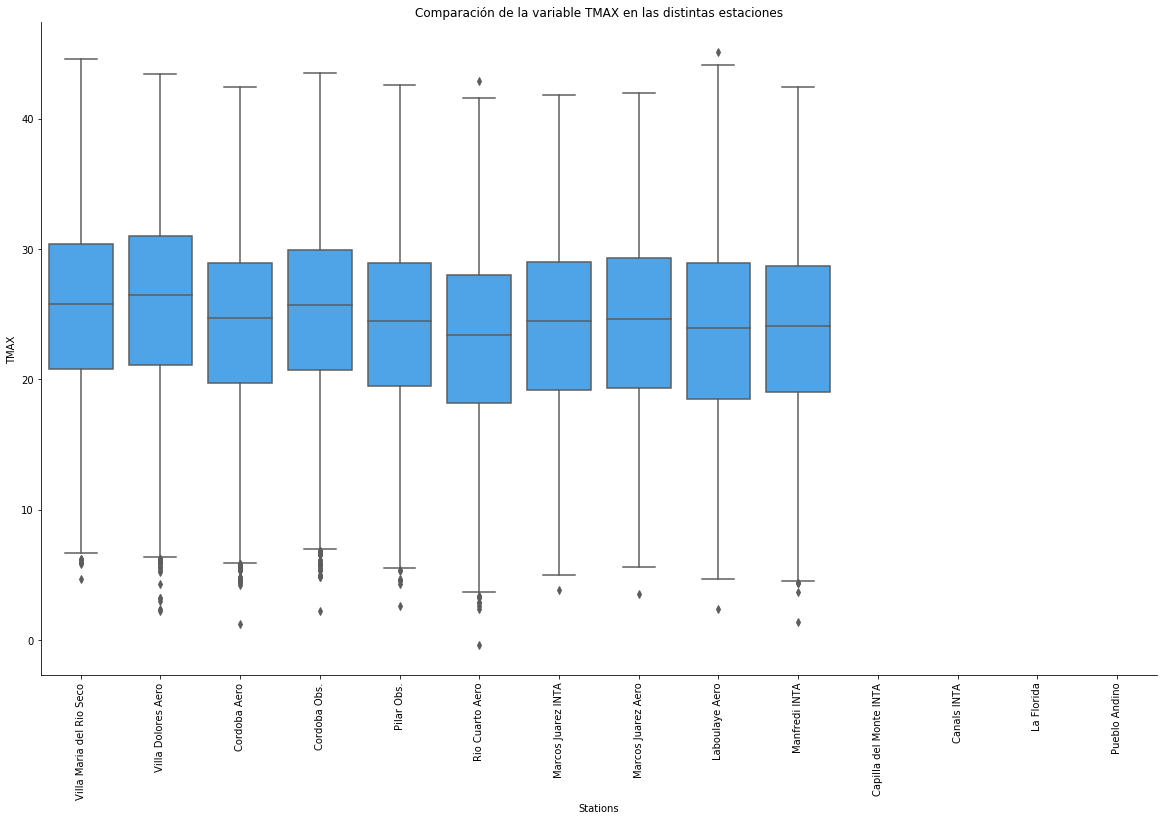

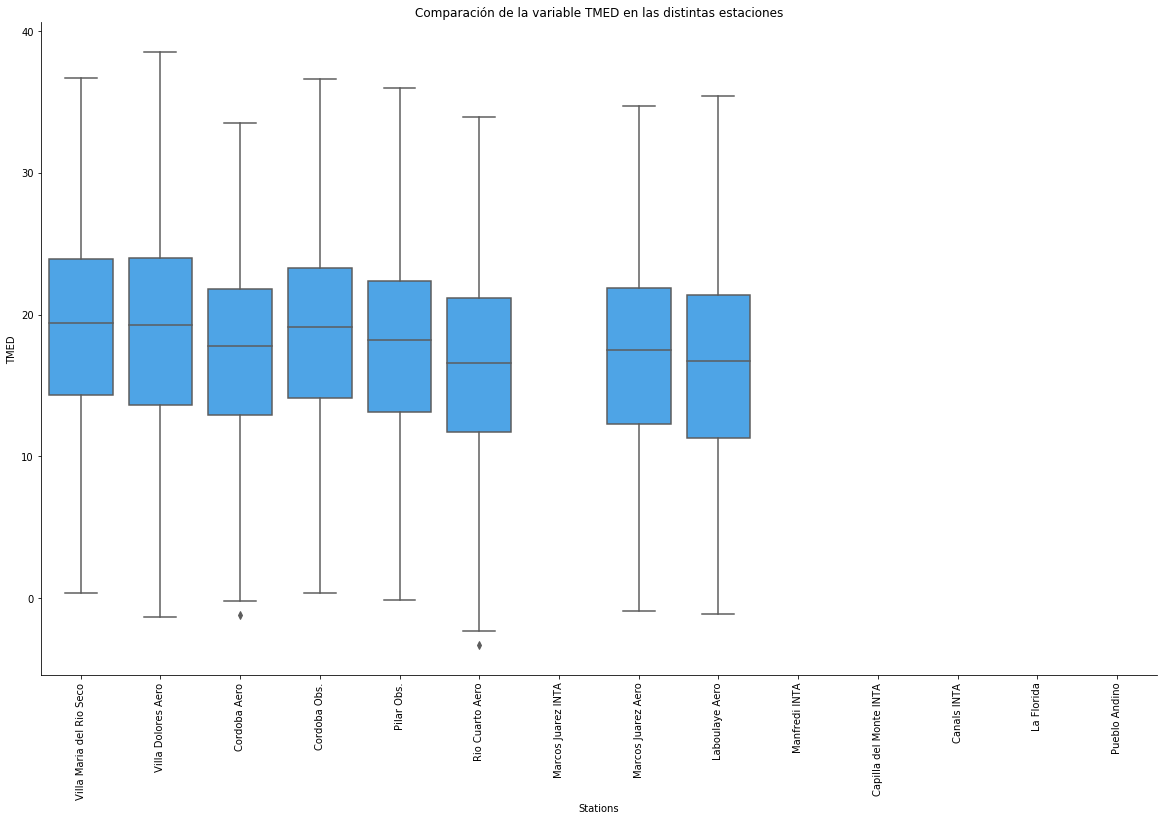

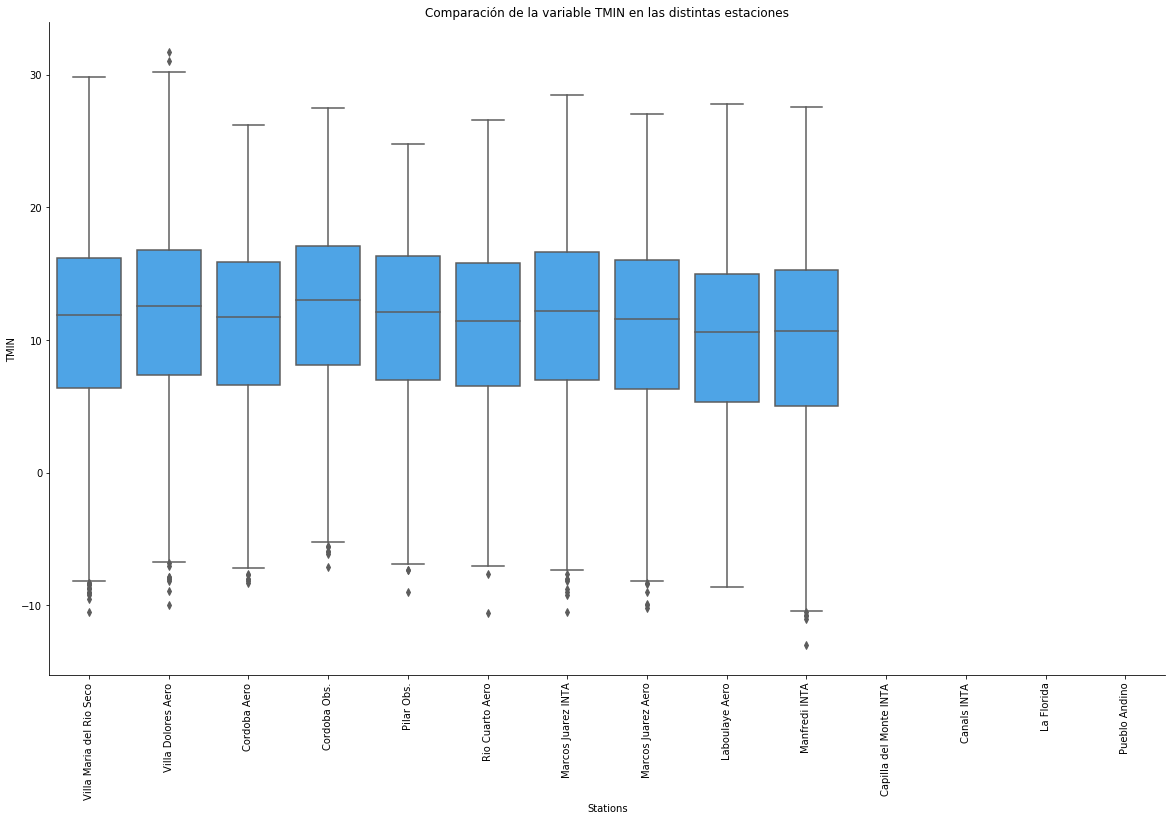

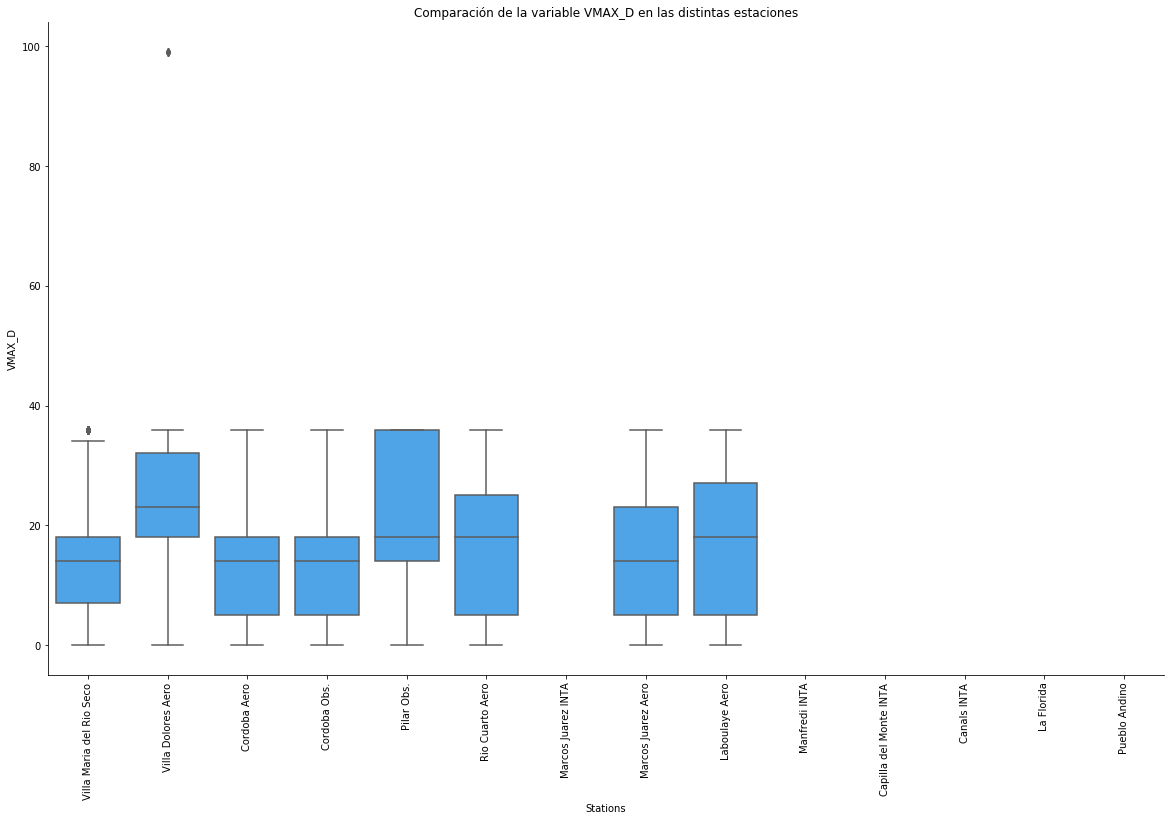

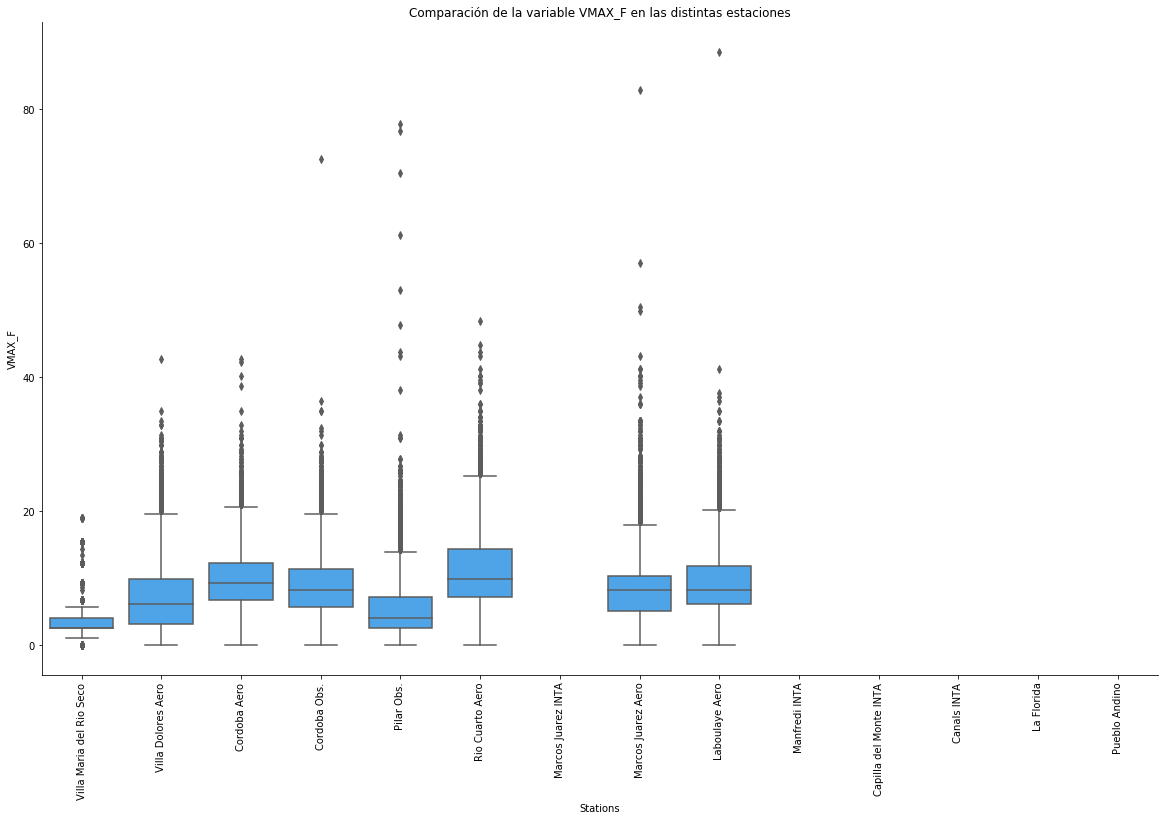

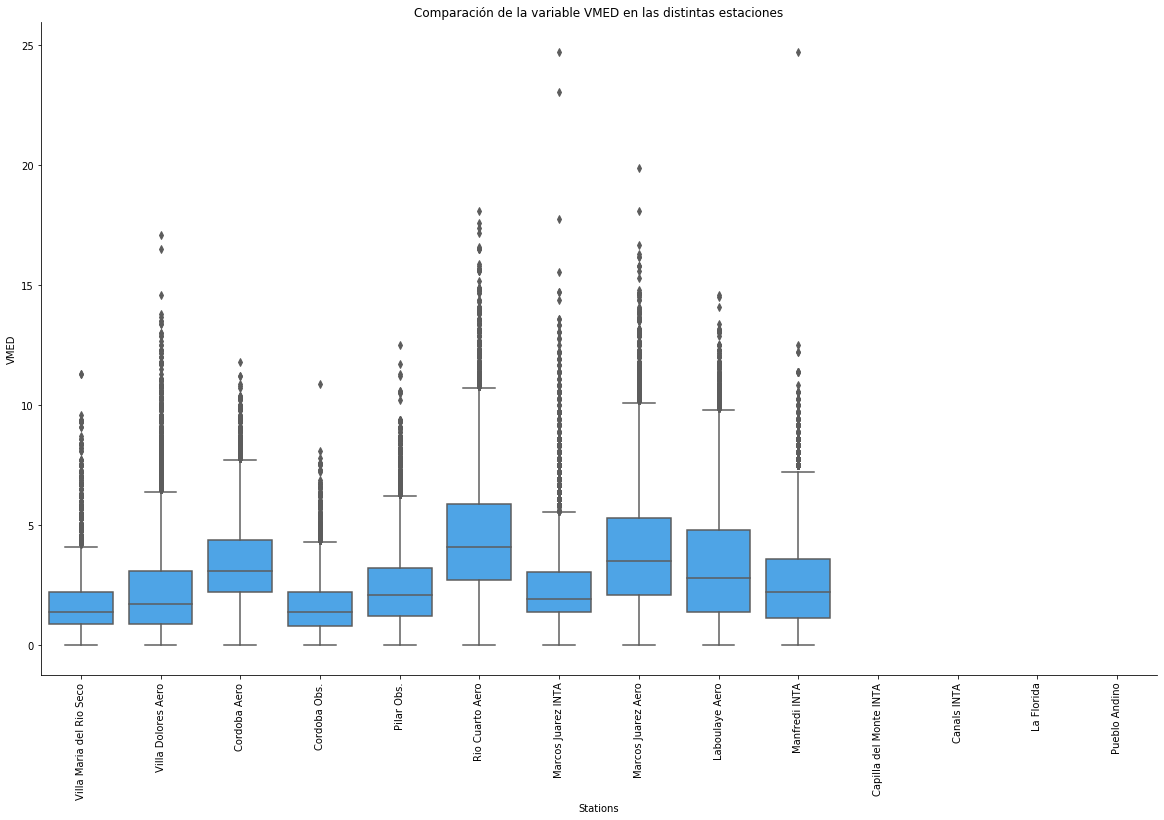

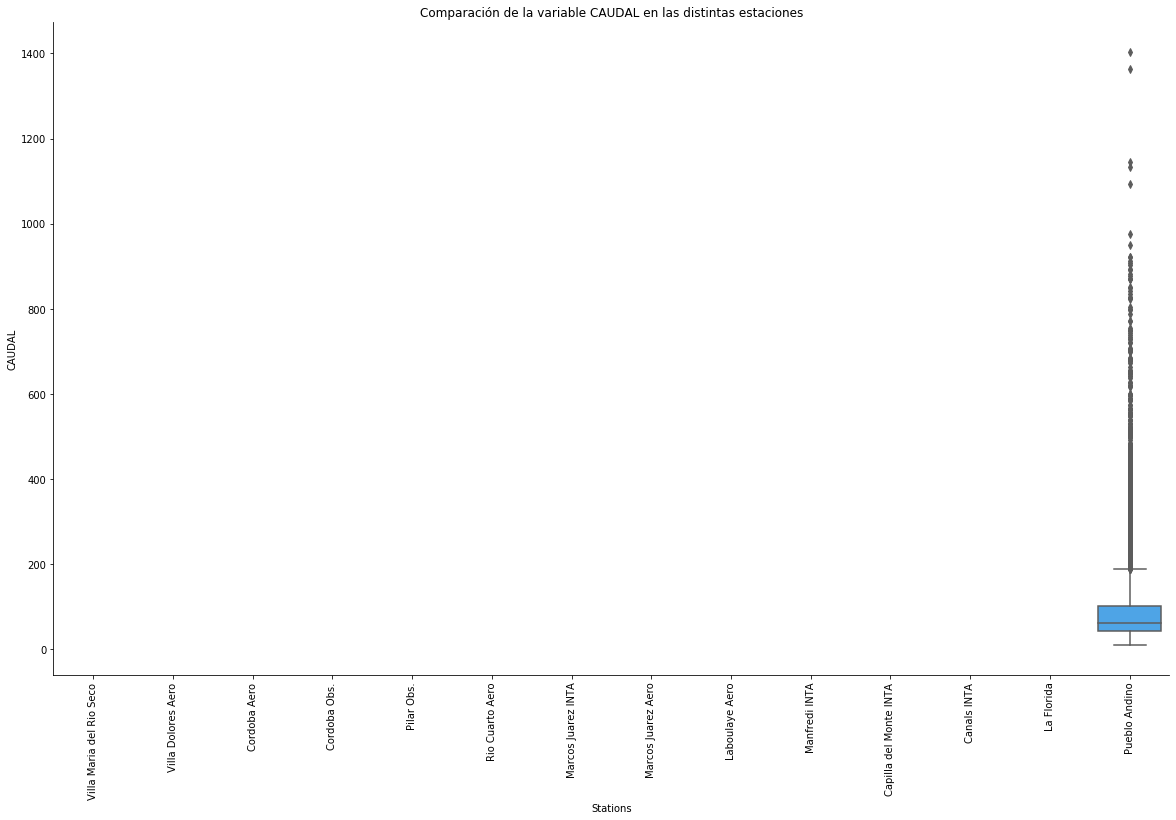

In [14]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

dataset_with_stations = dataset.copy()
dataset_with_stations['station'] = dataset_with_stations['omm_id'].replace(stations)
dataset_with_stations.reset_index(inplace=True)
not_numeric_cols = ['fecha', 'id', 'omm_id', 'station']
numeric_cols = [c for c in dataset_with_stations.columns if c not in not_numeric_cols]
for numeric_col in numeric_cols:
    plt.figure(figsize=(20,12))
    seaborn.boxplot(data=dataset_with_stations,
                    x='station', y=numeric_col,
                    color=BLUE)
    plt.ylabel(numeric_col.upper())
    plt.xlabel('Stations')
    plt.title(f'Comparación de la variable {numeric_col.upper()} en las distintas estaciones')
    plt.xticks(rotation=90)
    seaborn.despine()

## 1.4

Observamos valores outliers para las siguientes variables:
* HR
* PRCP *
* PRES_EST
* PRES_NM
* TD
* TMAX
* TMED
* TMIN
* VMAX_D
* VMAX_F *
* VMED *
* CAUDAL

En las variables marcadas (*) es muy probables que los outliers que se visualizan correspondan a valores correctos, esto es por la naturaleza de la variable analizada.

## 2.1

In [15]:
def get_hydro_year(date_, start_month=7):
    year = date_.strftime('%Y')
    month = date_.strftime('%m')
    offset = 1 if int(month) >= start_month - 1 else 0
    hydro_year = int(year) + offset - 1
    return hydro_year

In [16]:
dataset_with_hydro_year = dataset.copy()
dataset_with_hydro_year.reset_index(inplace=True)
dataset_with_hydro_year['hydro_year'] = dataset_with_hydro_year['fecha'].apply(lambda fecha: get_hydro_year(fecha))
dataset_with_hydro_year['station'] = dataset_with_hydro_year['omm_id'].replace(stations)
dataset_with_hydro_year['station_elev'] = dataset_with_hydro_year['omm_id'].replace(elev)

In [19]:
prcp_mean_by_hydro_year_and_station = dataset_with_hydro_year.groupby(['hydro_year', 'omm_id']).sum()['prcp'].groupby(['omm_id']).mean()

In [39]:
prcp_mean_by_hydro_year_and_station_dict = prcp_mean_by_hydro_year_and_station.to_frame().to_dict()

In [40]:
stations_df_prcp_mean = stations_dataset.copy()
stations_df_prcp_mean['prcp_mean'] = stations_dataset['omm_id'].replace(prcp_mean_by_hydro_year_and_station_dict['prcp'])
stations_df_prcp_mean[['omm_id', 'nombre', 'elev', 'prcp_mean']]

,omm_id,nombre,elev,prcp_mean
0,87244,Villa Maria del Rio Seco,341,786.336667
1,87328,Villa Dolores Aero,569,610.985000
2,87344,Cordoba Aero,474,835.306667
3,87345,Cordoba Obs.,426,786.160000
4,87349,Pilar Obs.,338,766.558333
5,87466,Marcos Juarez INTA,110,887.980769
6,87453,Rio Cuarto Aero,421,826.910000
7,87467,Marcos Juarez Aero,114,910.680000
8,87534,Laboulaye Aero,137,873.285000
9,9987009,Manfredi INTA,292,771.646939


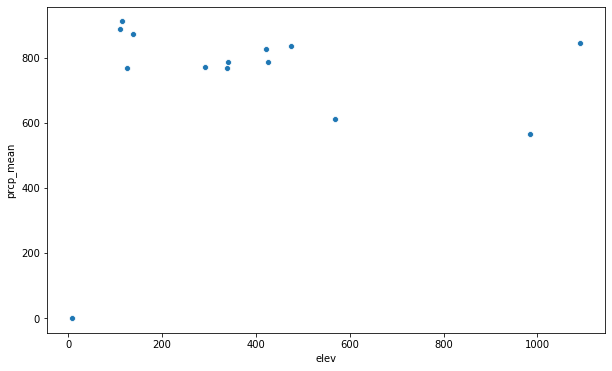

In [44]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="elev", y="prcp_mean", data=stations_df_prcp_mean)

## 2.2

In [73]:
pueblo_andino_s_caudal_sum = dataset_with_hydro_year[dataset_with_hydro_year['omm_id'] == 2].groupby(['hydro_year'])['caudal'].sum()

In [74]:
pueblo_andino_s_caudal_sum

hydro_year
1979     4776.920000
1980    26842.196000
1981    22752.626000
1982    18063.433000
1983    30056.648000
1984    25702.124000
1985    26768.188000
1986    23429.423000
1987    24969.438000
1988    14887.941000
1989    17725.992000
1990    27159.531000
1992     8329.016000
1993    41478.948000
1994    24591.611000
1995    20122.878000
1996    11818.886000
1997    30084.455000
1998    30233.897000
1999    40710.882840
2000    38582.123230
2001    59214.508710
2002    37322.560500
2003    19279.782870
2004    35631.935130
2005    22152.961740
2006    41325.916970
2007    25554.459230
2008    17674.592240
2009    29793.352290
2010    22210.965248
2011    19134.404550
2012    54634.630840
2013    41864.833000
2014    58444.562949
2015    77834.273001
2016    49119.316340
2017     7431.643070
Name: caudal, dtype: float64

In [76]:
mk.hamed_rao_modification_test(pueblo_andino_s_caudal_sum)

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=True, p=0.022132474436973526, z=2.2880866687609664, Tau=0.2603129445234708, s=183.0, var_s=6327.0, slope=585.4231422727288, intercept=15404.827867954513)

In [77]:
mk.sens_slope(pueblo_andino_s_caudal_sum)

Sens_Slope_Test(slope=585.4231422727288, intercept=15404.827867954513)

## 2.3

In [95]:
pmda_prcp_max = dataset_with_hydro_year.groupby(['hydro_year', 'station'])['prcp'].max()
pmda_prcp_max_df = pmda_prcp_max.to_frame().reset_index()

In [106]:
for station in stations:
    station_name = stations[station]
    if 'Pueblo Andino' != station_name:
        print(f'\n Estación: {station_name}')
        data = pmda_prcp_max_df[pmda_prcp_max_df['station'] == stations[station]]['prcp']
        print(mk.hamed_rao_modification_test(data))
        print(mk.sens_slope(data))


 Estación: Villa Maria del Rio Seco
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.12269960237515654, z=-1.5435408566926845, Tau=-0.15141242937853108, s=-268.0, var_s=29921.699958227022, slope=-0.28651515151515133, intercept=78.35219696969698)
Sens_Slope_Test(slope=-0.28651515151515133, intercept=78.35219696969698)

 Estación: Villa Dolores Aero
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.22830841436827365, z=1.204727763608024, Tau=0.09491525423728814, s=168.0, var_s=19215.65108501739, slope=0.1336342229199372, intercept=47.55779042386185)
Sens_Slope_Test(slope=0.1336342229199372, intercept=47.55779042386185)

 Estación: Cordoba Aero
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.19095506582412058, z=1.3077589964825242, Tau=0.11638418079096045, s=206.0, var_s=24572.666666666668, slope=0.23881506090808413, intercept=65.55495570321152)
Sens_Slope_Test(slope=0.23881506090808413, intercept=65.5549

## 2.4

In [111]:
tmed_max = dataset_with_hydro_year.groupby(['hydro_year', 'station'])['tmed'].max()
tmed_max_df = tmed_max.to_frame().reset_index()

In [116]:
ex = ['Pueblo Andino', 'La Florida', 'Marcos Juarez INTA', 'Manfredi INTA', 'Capilla del Monte INTA', 'Canals INTA']
for station in stations:
    station_name = stations[station]
    if station_name not in ex:
        print(f'\n Estación: {station_name}')
        data = tmed_max_df[tmed_max_df['station'] == stations[station]]['tmed']
        print(mk.hamed_rao_modification_test(data))
        print(mk.sens_slope(data))


 Estación: Villa Maria del Rio Seco
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.44744318077190814, z=-0.7596845254226279, Tau=-0.06779661016949153, s=-120.0, var_s=24537.333333333332, slope=-0.009523809523809405, intercept=33.48095238095238)
Sens_Slope_Test(slope=-0.009523809523809405, intercept=33.48095238095238)

 Estación: Villa Dolores Aero
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.297347340425933, z=-1.0421387819784487, Tau=-0.09143686502177069, s=-126.0, var_s=14386.955824560711, slope=-0.014589665653495433, intercept=32.781458966565346)
Sens_Slope_Test(slope=-0.014589665653495433, intercept=32.781458966565346)

 Estación: Cordoba Aero
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.4218417008952424, z=0.8032301866558773, Tau=0.06836158192090395, s=121.0, var_s=22319.39657791385, slope=0.008081632653061232, intercept=29.311591836734696)
Sens_Slope_Test(slope=0.008081632653061232, int

In [117]:
def distribution_search(dataset, 
                        proposed_distribution='norm', 
                        lower_limit_a=0, 
                        upper_limit_a=5, 
                        space_a = 0.05, 
                        lower_limit_b=0, 
                        upper_limit_b=5,
                        space_b=0.05,
                        n=100
                       ):

    a_ = np.arange(lower_limit_a, upper_limit_a, space_a)
    b_ = np.arange(lower_limit_b, upper_limit_b, s)